# Text Analytics
 


In [1]:
import pandas as pd

In [2]:
import sqlite3
conn = sqlite3.connect('../data/BoxOffice.db')

In [3]:
df = pd.read_sql("SELECT * FROM movie_overview LIMIT 20",conn)

In [4]:
df.overview

0     When Lou, who has become the "father of the In...
1     Mia Thermopolis is now a college graduate and ...
2     Under the direction of a ruthless instructor, ...
3     Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4     Marine Boy is the story of a former national s...
5     Pinocchio and his friends, a glow worm and a m...
6     A young girl buys an antique box at a yard sal...
7     A chronicle which provides a rare window into ...
8     After telling the story of Flint's last journe...
9     In "A Mighty Wind", director Christopher Guest...
10    When world heavyweight boxing champion, Apollo...
11    The members of the Lambda Lambda Lambda frater...
12    Lester Burnham, a depressed suburban father in...
13    Disenchanted with the movie industry, Chili Pa...
14    John Anderton is a top 'Precrime' cop in the l...
15    Novica is a mathematics champion in a Belgrade...
16    After attending the funeral of her grandmother...
17    In 1857, at the height of his fame and for

In [5]:
df.overview[18]

'While working a job at an exclusive ski resort to support her Dad, Kim learns to snowboard and is so good at it that she enters a competition with a huge cash prize. She has to dig deep to overcome her fears, but her life gets more complicated through her spoken-for boss, Jonny.'

In [1]:
#!pip install nltk

In [6]:
import nltk

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentence tokenize

In [8]:
from nltk.tokenize import sent_tokenize

In [9]:
text = df['overview'].astype('str')

In [10]:
text = text.sum()

In [11]:
text

'When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her \'princess lessons\'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end when everyone t

In [12]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess.', 'Her best friend Lilly also joins her for the summer.', "Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal.", 'But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi.', 'Seven months pregnant and alone in a festive city, she begins a relentless search for her husband.', 'With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end w

### Word tokenize

In [13]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['When', 'Lou', ',', 'who', 'has', 'become', 'the', '``', 'father', 'of', 'the', 'Internet', ',', "''", 'is', 'shot', 'by', 'an', 'unknown', 'assailant', ',', 'Jacob', 'and', 'Nick', 'fire', 'up', 'the', 'time', 'machine', 'again', 'to', 'save', 'their', 'friend.Mia', 'Thermopolis', 'is', 'now', 'a', 'college', 'graduate', 'and', 'on', 'her', 'way', 'to', 'Genovia', 'to', 'take', 'up', 'her', 'duties', 'as', 'princess', '.', 'Her', 'best', 'friend', 'Lilly', 'also', 'joins', 'her', 'for', 'the', 'summer', '.', 'Mia', 'continues', 'her', "'princess", "lessons'-", 'riding', 'horses', 'side-saddle', ',', 'archery', ',', 'and', 'other', 'royal', '.', 'But', 'her', 'complicated', 'life', 'is', 'turned', 'upside', 'down', 'once', 'again', 'when', 'she', 'not', 'only', 'learns', 'that', 'she', 'is', 'to', 'take', 'the', 'crown', 'as', 'queen', 'earlier', 'than', 'expected', '...', 'Under', 'the', 'direction', 'of', 'a', 'ruthless', 'instructor', ',', 'a', 'talented', 'young', 'drummer', 'begi

### Frequency Distribution

In [14]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 551 samples and 1112 outcomes>


In [15]:
fdist.most_common(15)

[('the', 60),
 (',', 54),
 ('a', 41),
 ('to', 37),
 ('and', 30),
 ('.', 25),
 ('of', 22),
 ('in', 20),
 ('is', 18),
 ('her', 18),
 ('for', 15),
 ('his', 12),
 ('as', 10),
 ('by', 9),
 ('at', 9)]

### Punctuation signs

In [16]:
#string.punctuation
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in fdist]
print(stripped[:100])

['When', 'Lou', '', 'who', 'has', 'become', 'the', '', 'father', 'of', 'Internet', '', 'is', 'shot', 'by', 'an', 'unknown', 'assailant', 'Jacob', 'and', 'Nick', 'fire', 'up', 'time', 'machine', 'again', 'to', 'save', 'their', 'friendMia', 'Thermopolis', 'now', 'a', 'college', 'graduate', 'on', 'her', 'way', 'Genovia', 'take', 'duties', 'as', 'princess', '', 'Her', 'best', 'friend', 'Lilly', 'also', 'joins', 'for', 'summer', 'Mia', 'continues', 'princess', 'lessons', 'riding', 'horses', 'sidesaddle', 'archery', 'other', 'royal', 'But', 'complicated', 'life', 'turned', 'upside', 'down', 'once', 'when', 'she', 'not', 'only', 'learns', 'that', 'crown', 'queen', 'earlier', 'than', 'expected', '', 'Under', 'direction', 'ruthless', 'instructor', 'talented', 'young', 'drummer', 'begins', 'pursue', 'perfection', 'at', 'any', 'cost', 'even', 'his', 'humanityVidya', 'Bagchi', '', 'Vidya']


### Stop-words

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'been', 'few', 'haven', 'against', 'couldn', 'again', 'than', "should've", 'theirs', 'both', 'does', 'itself', "it's", 'more', 'about', 'have', "didn't", 'any', 'isn', 'll', "aren't", 'up', 'then', "needn't", 'shouldn', 'ain', 'where', 'but', 'while', 'own', 'my', 'did', 'doesn', 'of', 'we', 'through', "wasn't", 'his', 'yourself', 'as', 'same', "hasn't", 'them', 'no', 'this', 'after', 'am', 'by', 'above', 'himself', 'an', 'aren', "isn't", 'down', 'only', 'herself', 'themselves', 'below', 'when', "mightn't", 'him', 'too', 'mightn', "don't", 'ourselves', "couldn't", "haven't", 'because', 'to', 'ours', 'such', "weren't", 'having', 'its', 'weren', 't', 'was', 'between', 'our', "mustn't", 'under', 'myself', 'wouldn', 'most', 'yourselves', "you'd", 'very', 's', 'can', 'if', 'you', 'it', 'y', 'hasn', 'further', 'your', 'be', 'hadn', 'how', 'why', 'on', 'at', 'she', "you'll", 'didn', 'a', "doesn't", 'for', 'over', 'out', 'off', 'so', "shouldn't", "shan't", 'doing', 'had', "you've", "that'll",

### Remove stopwords

In [19]:
filtered_sent=[]
for w in stripped:
    if w not in stop_words:
        filtered_sent.append(w)


In [20]:
print("Count:",len(tokenized_word))
print("Tokenized Sentence:",tokenized_word)

Count: 1112
Tokenized Sentence: ['When', 'Lou', ',', 'who', 'has', 'become', 'the', '``', 'father', 'of', 'the', 'Internet', ',', "''", 'is', 'shot', 'by', 'an', 'unknown', 'assailant', ',', 'Jacob', 'and', 'Nick', 'fire', 'up', 'the', 'time', 'machine', 'again', 'to', 'save', 'their', 'friend.Mia', 'Thermopolis', 'is', 'now', 'a', 'college', 'graduate', 'and', 'on', 'her', 'way', 'to', 'Genovia', 'to', 'take', 'up', 'her', 'duties', 'as', 'princess', '.', 'Her', 'best', 'friend', 'Lilly', 'also', 'joins', 'her', 'for', 'the', 'summer', '.', 'Mia', 'continues', 'her', "'princess", "lessons'-", 'riding', 'horses', 'side-saddle', ',', 'archery', ',', 'and', 'other', 'royal', '.', 'But', 'her', 'complicated', 'life', 'is', 'turned', 'upside', 'down', 'once', 'again', 'when', 'she', 'not', 'only', 'learns', 'that', 'she', 'is', 'to', 'take', 'the', 'crown', 'as', 'queen', 'earlier', 'than', 'expected', '...', 'Under', 'the', 'direction', 'of', 'a', 'ruthless', 'instructor', ',', 'a', 'tale

In [21]:
print("Count:",len(filtered_sent))
print("Filterd Sentence:",filtered_sent)

Count: 479
Filterd Sentence: ['When', 'Lou', '', 'become', '', 'father', 'Internet', '', 'shot', 'unknown', 'assailant', 'Jacob', 'Nick', 'fire', 'time', 'machine', 'save', 'friendMia', 'Thermopolis', 'college', 'graduate', 'way', 'Genovia', 'take', 'duties', 'princess', '', 'Her', 'best', 'friend', 'Lilly', 'also', 'joins', 'summer', 'Mia', 'continues', 'princess', 'lessons', 'riding', 'horses', 'sidesaddle', 'archery', 'royal', 'But', 'complicated', 'life', 'turned', 'upside', 'learns', 'crown', 'queen', 'earlier', 'expected', '', 'Under', 'direction', 'ruthless', 'instructor', 'talented', 'young', 'drummer', 'begins', 'pursue', 'perfection', 'cost', 'even', 'humanityVidya', 'Bagchi', '', 'Vidya', 'Balan', '', 'arrives', 'Kolkata', 'London', 'find', 'missing', 'husband', 'Arnab', 'Seven', 'months', 'pregnant', 'alone', 'festive', 'city', 'relentless', 'search', 'With', 'nothing', 'rely', 'except', 'fragments', 'memories', 'clues', 'seem', 'reach', 'dead', 'end', 'everyone', 'tries', 

## Lexicon Normalization
 

### Stemming


In [22]:
from nltk.stem import PorterStemmer

In [23]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))


In [24]:
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['When', 'Lou', '', 'become', '', 'father', 'Internet', '', 'shot', 'unknown', 'assailant', 'Jacob', 'Nick', 'fire', 'time', 'machine', 'save', 'friendMia', 'Thermopolis', 'college', 'graduate', 'way', 'Genovia', 'take', 'duties', 'princess', '', 'Her', 'best', 'friend', 'Lilly', 'also', 'joins', 'summer', 'Mia', 'continues', 'princess', 'lessons', 'riding', 'horses', 'sidesaddle', 'archery', 'royal', 'But', 'complicated', 'life', 'turned', 'upside', 'learns', 'crown', 'queen', 'earlier', 'expected', '', 'Under', 'direction', 'ruthless', 'instructor', 'talented', 'young', 'drummer', 'begins', 'pursue', 'perfection', 'cost', 'even', 'humanityVidya', 'Bagchi', '', 'Vidya', 'Balan', '', 'arrives', 'Kolkata', 'London', 'find', 'missing', 'husband', 'Arnab', 'Seven', 'months', 'pregnant', 'alone', 'festive', 'city', 'relentless', 'search', 'With', 'nothing', 'rely', 'except', 'fragments', 'memories', 'clues', 'seem', 'reach', 'dead', 'end', 'everyone', 'tries', 'convince'

In [25]:
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['when', 'lou', '', 'becom', '', 'father', 'internet', '', 'shot', 'unknown', 'assail', 'jacob', 'nick', 'fire', 'time', 'machin', 'save', 'friendmia', 'thermopoli', 'colleg', 'graduat', 'way', 'genovia', 'take', 'duti', 'princess', '', 'her', 'best', 'friend', 'lilli', 'also', 'join', 'summer', 'mia', 'continu', 'princess', 'lesson', 'ride', 'hors', 'sidesaddl', 'archeri', 'royal', 'but', 'complic', 'life', 'turn', 'upsid', 'learn', 'crown', 'queen', 'earlier', 'expect', '', 'under', 'direct', 'ruthless', 'instructor', 'talent', 'young', 'drummer', 'begin', 'pursu', 'perfect', 'cost', 'even', 'humanityvidya', 'bagchi', '', 'vidya', 'balan', '', 'arriv', 'kolkata', 'london', 'find', 'miss', 'husband', 'arnab', 'seven', 'month', 'pregnant', 'alon', 'festiv', 'citi', 'relentless', 'search', 'with', 'noth', 'reli', 'except', 'fragment', 'memori', 'clue', 'seem', 'reach', 'dead', 'end', 'everyon', 'tri', 'convinc', 'exist', 'she', 'slowli', 'realis', 'seem', 'In', 'soak',

### Lemmatization

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "flying"

In [29]:
print("Lemmatized Word:",lem.lemmatize(word,"v"))

Lemmatized Word: fly


In [30]:
print("Stemmed Word:",stem.stem(word))

Stemmed Word: fli


### Part of Speech (POS) Tagging

In [31]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tomas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
wrds = df.overview[16]
wrds

"After attending the funeral of her grandmother in Dallas, the Lux Atlantic Hotel manager Lisa is waiting for a flight to Miami. Due to the bad weather and consequent flight delay, she meets in the airport bar Jack Rippner, who is also in the waiting list. They sit together in the plane, and Jack reveals that he wants Lisa to change the room in Lux of an important American politician to facilitate a terrorist attempt against him. Otherwise, Lisa's father will be killed by a hit man. Lisa has to decide what to do with the menacing man at her side."

In [33]:
tokens=nltk.word_tokenize(wrds)
print(tokens)

['After', 'attending', 'the', 'funeral', 'of', 'her', 'grandmother', 'in', 'Dallas', ',', 'the', 'Lux', 'Atlantic', 'Hotel', 'manager', 'Lisa', 'is', 'waiting', 'for', 'a', 'flight', 'to', 'Miami', '.', 'Due', 'to', 'the', 'bad', 'weather', 'and', 'consequent', 'flight', 'delay', ',', 'she', 'meets', 'in', 'the', 'airport', 'bar', 'Jack', 'Rippner', ',', 'who', 'is', 'also', 'in', 'the', 'waiting', 'list', '.', 'They', 'sit', 'together', 'in', 'the', 'plane', ',', 'and', 'Jack', 'reveals', 'that', 'he', 'wants', 'Lisa', 'to', 'change', 'the', 'room', 'in', 'Lux', 'of', 'an', 'important', 'American', 'politician', 'to', 'facilitate', 'a', 'terrorist', 'attempt', 'against', 'him', '.', 'Otherwise', ',', 'Lisa', "'s", 'father', 'will', 'be', 'killed', 'by', 'a', 'hit', 'man', '.', 'Lisa', 'has', 'to', 'decide', 'what', 'to', 'do', 'with', 'the', 'menacing', 'man', 'at', 'her', 'side', '.']


In [34]:
nltk.pos_tag(tokens)

[('After', 'IN'),
 ('attending', 'VBG'),
 ('the', 'DT'),
 ('funeral', 'NN'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('grandmother', 'NN'),
 ('in', 'IN'),
 ('Dallas', 'NNP'),
 (',', ','),
 ('the', 'DT'),
 ('Lux', 'NNP'),
 ('Atlantic', 'NNP'),
 ('Hotel', 'NNP'),
 ('manager', 'NN'),
 ('Lisa', 'NNP'),
 ('is', 'VBZ'),
 ('waiting', 'VBG'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('flight', 'NN'),
 ('to', 'TO'),
 ('Miami', 'NNP'),
 ('.', '.'),
 ('Due', 'NNP'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('bad', 'JJ'),
 ('weather', 'NN'),
 ('and', 'CC'),
 ('consequent', 'JJ'),
 ('flight', 'NN'),
 ('delay', 'NN'),
 (',', ','),
 ('she', 'PRP'),
 ('meets', 'VBZ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('airport', 'NN'),
 ('bar', 'NN'),
 ('Jack', 'NNP'),
 ('Rippner', 'NNP'),
 (',', ','),
 ('who', 'WP'),
 ('is', 'VBZ'),
 ('also', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('waiting', 'VBG'),
 ('list', 'NN'),
 ('.', '.'),
 ('They', 'PRP'),
 ('sit', 'VBP'),
 ('together', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('plane', 'NN'),
 (',', ',

## EDA for Text Analysis
 
### Bag-of-Words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [48]:
token2 = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token2.tokenize)
#text_counts= cv.fit_transform(tokenized_text)
text_counts= cv.fit_transform(tokenized_word)

In [49]:
print(text_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
print(text_counts)

  (1, 240)	1
  (8, 139)	1
  (11, 202)	1
  (15, 350)	1
  (18, 399)	1
  (19, 18)	1
  (21, 208)	1
  (23, 278)	1
  (27, 385)	1
  (28, 243)	1
  (31, 340)	1
  (33, 157)	1
  (33, 259)	1
  (34, 384)	1
  (38, 69)	1
  (39, 171)	1
  (43, 409)	1
  (45, 163)	1
  (50, 118)	1
  (52, 305)	1
  (55, 35)	1
  (56, 157)	1
  (57, 232)	1
  (59, 213)	1
  (63, 369)	1
  :	:
  (1058, 153)	1
  (1059, 252)	1
  (1061, 236)	1
  (1063, 260)	1
  (1068, 381)	1
  (1069, 143)	1
  (1073, 157)	1
  (1076, 57)	1
  (1079, 170)	1
  (1080, 273)	1
  (1081, 78)	1
  (1082, 296)	1
  (1085, 138)	1
  (1088, 420)	1
  (1089, 44)	1
  (1092, 138)	1
  (1094, 373)	1
  (1096, 218)	1
  (1099, 153)	1
  (1100, 194)	1
  (1102, 204)	1
  (1104, 309)	1
  (1106, 58)	1
  (1108, 134)	1
  (1110, 217)	1


In [51]:
print(tokenized_text)

['When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess.', 'Her best friend Lilly also joins her for the summer.', "Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal.", 'But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi.', 'Seven months pregnant and alone in a festive city, she begins a relentless search for her husband.', 'With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end w

In [40]:
from collections import Counter

In [52]:
bow = Counter(filtered_sent)
bow.most_common(100)

[('', 12),
 ('princess', 2),
 ('When', 1),
 ('Lou', 1),
 ('become', 1),
 ('father', 1),
 ('Internet', 1),
 ('shot', 1),
 ('unknown', 1),
 ('assailant', 1),
 ('Jacob', 1),
 ('Nick', 1),
 ('fire', 1),
 ('time', 1),
 ('machine', 1),
 ('save', 1),
 ('friendMia', 1),
 ('Thermopolis', 1),
 ('college', 1),
 ('graduate', 1),
 ('way', 1),
 ('Genovia', 1),
 ('take', 1),
 ('duties', 1),
 ('Her', 1),
 ('best', 1),
 ('friend', 1),
 ('Lilly', 1),
 ('also', 1),
 ('joins', 1),
 ('summer', 1),
 ('Mia', 1),
 ('continues', 1),
 ('lessons', 1),
 ('riding', 1),
 ('horses', 1),
 ('sidesaddle', 1),
 ('archery', 1),
 ('royal', 1),
 ('But', 1),
 ('complicated', 1),
 ('life', 1),
 ('turned', 1),
 ('upside', 1),
 ('learns', 1),
 ('crown', 1),
 ('queen', 1),
 ('earlier', 1),
 ('expected', 1),
 ('Under', 1),
 ('direction', 1),
 ('ruthless', 1),
 ('instructor', 1),
 ('talented', 1),
 ('young', 1),
 ('drummer', 1),
 ('begins', 1),
 ('pursue', 1),
 ('perfection', 1),
 ('cost', 1),
 ('even', 1),
 ('humanityVidya', 1),

In [53]:
import pandas as pd
lst1 = pd.DataFrame({bow.values()},columns=bow.keys()).transpose()
lst1[0]

When            1
Lou             1
               12
become          1
father          1
               ..
immediately     1
involved        1
protecting      1
exposing        1
kidnappers      1
Name: 0, Length: 467, dtype: int64

In [59]:
#lst1
lst1 = lst1.sort_values(by=0,ascending=False)

In [56]:
import seaborn as sns

In [76]:
lst1.iloc[1:10,0]

princess     2
When         1
around       1
widow        1
romancing    1
meeting      1
Palmer       1
Chili        1
industry     1
Name: 0, dtype: int64

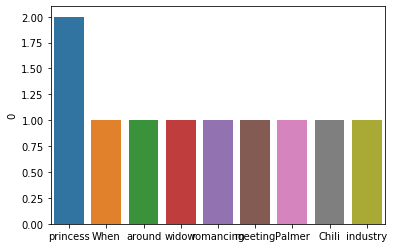

In [78]:
sns.barplot(x=lst1.iloc[1:10,0].index,y=lst1.iloc[1:10,0])

### Word Cloud

In [79]:
#!pip install wordcloud
from wordcloud import WordCloud

In [80]:
wc = WordCloud(width=800, height=800, background_color='white', max_words=150)
wc.generate_from_frequencies(bow)

In [81]:
import matplotlib.pyplot as plt 

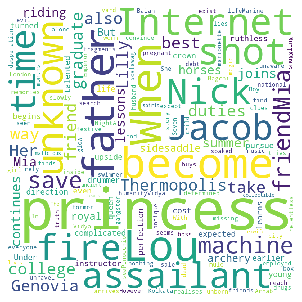

In [82]:
plt.imshow(wc)
#fig = plt.figure(figsize=(6,8))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Preparing the dataset for analysis
 
For analysis of the data, we have to prepare the text dataset. For this, we first have to generate a list of the most common words used over all the text. We use Bag-of-Words (BOW) for this. After we have the final list of the words, we create for each movie review the count of such words. The final dataset will be generated by creating a dataframe where the rows are the movies and the columns are the word's count.

In [83]:
lang = pd.read_sql("SELECT movie_id FROM movie_languages WHERE iso_639_1='en' and sw_original_lang=1",conn)
movie_id = lang.movie_id.tolist()
movie_id

[1,
 2,
 3,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 73,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 94,
 95,
 100,
 101,
 102,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 

In [84]:
df = pd.read_sql("""SELECT a.* FROM movie_overview a
                    INNER JOIN movie_languages b
                    ON a.id = b.movie_id
                    WHERE iso_639_1='en' and sw_original_lang=1
                    AND id NOT IN (80)""",conn)

In [85]:
df.head()

,id,overview
0,1,"When Lou, who has become the ""father of the In..."
1,2,Mia Thermopolis is now a college graduate and ...
2,3,"Under the direction of a ruthless instructor, ..."
3,6,"Pinocchio and his friends, a glow worm and a m..."
4,7,A young girl buys an antique box at a yard sal...


In [86]:
df.shape

(6201, 2)

In [87]:
################
### Data Cleansing
################
wrds = []
n = df.shape[0]
dftext = {}

for i in range(0,n):
    movie = df.loc[i,'id']
    ### Preprocessing
    text = df.loc[i,'overview']
    ### skip movies with empty overview
    if text != None:
        ### tokenizing
        tokenized_word=word_tokenize(text)
        ### remove punctuation
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokenized_word]
        ### remove stopwords
        stop_words=set(stopwords.words("english"))
        filtered_sent=[]
        for w in stripped:
            if w not in stop_words:
                filtered_sent.append(w)
        ### Lemmatization¶
        lem = WordNetLemmatizer()
        #lem.lemmatize(filtered_sent,"v")
        lem_strings=[]
        for w in filtered_sent:
            lem.lemmatize(w,"v")
            lem_strings.append(w)
        ### stemming
        #stem = PorterStemmer()
        #stem.stem(filtered_sent)
        bow = Counter(lem_strings)
        #print(movie,i,bow)
        #bow.most_common(20)
        bowlst = list(bow.keys())#.remove('')
        wrds.append(bowlst)
        dftext[movie] = dict(bow)
    

In [88]:
#!pip install itertools
import itertools
wrds_joined = list(itertools.chain.from_iterable(wrds))
print('total: ',len(wrds_joined))
print('unique: ',len(set(wrds_joined)))

total:  184268
unique:  28428


In [89]:
### get the unique words as base
wrds_unique = list(set(wrds_joined))

In [90]:
dftext

{1: {'When': 1,
  'Lou': 1,
  '': 6,
  'become': 1,
  'father': 1,
  'Internet': 1,
  'shot': 1,
  'unknown': 1,
  'assailant': 1,
  'Jacob': 1,
  'Nick': 1,
  'fire': 1,
  'time': 1,
  'machine': 1,
  'save': 1,
  'friend': 1},
 2: {'Mia': 2,
  'Thermopolis': 1,
  'college': 1,
  'graduate': 1,
  'way': 1,
  'Genovia': 1,
  'take': 2,
  'duties': 1,
  'princess': 2,
  '': 6,
  'Her': 1,
  'best': 1,
  'friend': 1,
  'Lilly': 1,
  'also': 1,
  'joins': 1,
  'summer': 1,
  'continues': 1,
  'lessons': 1,
  'riding': 1,
  'horses': 1,
  'sidesaddle': 1,
  'archery': 1,
  'royal': 1,
  'But': 1,
  'complicated': 1,
  'life': 1,
  'turned': 1,
  'upside': 1,
  'learns': 1,
  'crown': 1,
  'queen': 1,
  'earlier': 1,
  'expected': 1},
 3: {'Under': 1,
  'direction': 1,
  'ruthless': 1,
  'instructor': 1,
  '': 3,
  'talented': 1,
  'young': 1,
  'drummer': 1,
  'begins': 1,
  'pursue': 1,
  'perfection': 1,
  'cost': 1,
  'even': 1,
  'humanity': 1},
 6: {'Pinocchio': 1,
  'friends': 1,
  '

Now that we have the list of unique words and the word count for each movie, we proceed to generate the final dataset for analysis...


In [93]:
text_ff = pd.DataFrame(dftext)
text_ff.head()

,1,2,3,6,7,8,9,10,11,12,...,7388,7389,7390,7391,7392,7393,7394,7395,7396,7397
When,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Lou,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,6.0,6.0,3.0,5.0,3.0,8.0,6.0,10.0,5.0,7.0,...,4.0,3.0,1.0,1.0,10.0,7.0,1.0,10.0,9.0,8.0
become,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [94]:
text_ff = text_ff.transpose()
text_ff.head()

,When,Lou,,become,father,Internet,shot,unknown,assailant,Jacob,...,hijacker,DB,Galvin,downonhis,reduced,malpractice,platter,Blundering,preliminaries,punish
1,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
### substitute NaNs with zero
text_ff = text_ff.fillna(0)
text_ff.head()

,When,Lou,,become,father,Internet,shot,unknown,assailant,Jacob,...,hijacker,DB,Galvin,downonhis,reduced,malpractice,platter,Blundering,preliminaries,punish
1,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
text_ff.to_pickle("../data/text_ff.pckl")